**Librarys**

In [1]:
import pandas as pd
import numpy as np

#Statistic
from scipy import stats

#Visualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

**DataFrame**

In [2]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**Data Observation**

Unsupervised

continuous - total_bill, tip

category - sex,smoker,day,time,size

**Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

**Hypothesis Testing**

Continuons vs Continuous - Correlation Test

Continuous vs Category - T Test , ANOVA Test

Category vs Categoey - Chi-squared Test

**Central Limit Therom**

In [ ]:
#total_bill
population=df.total_bill.values
population_mean = population.mean()
samplesize=100
sample=np.random.choice(population,samplesize)
sample.mean()
sample_mean=[]
for i in range(40):
  sample1=np.random.choice(population,samplesize)
  sample_mean.append(sample1.mean())
np.mean(sample_mean)
print(f"population mean: {population_mean} and sample mean:", np.mean(sample_mean)  )

population mean: 19.78594262295082 and sample mean: 19.803402499999997


In [ ]:
#tip
population=df.tip.values
population_mean = population.mean()
samplesize=150
sample=np.random.choice(population,samplesize)
sample.mean()
sample_mean=[]
for i in range(40):
  sample1=np.random.choice(population,samplesize)
  sample_mean.append(sample1.mean())
np.mean(sample_mean)
print(f"population mean: {population_mean} and sample mean:", np.mean(sample_mean)  )

population mean: 2.99827868852459 and sample mean: 2.9846483333333333


**T Test**

1 sample T Test - Total bill

2 sample T Test - Total bill for each sex

In [ ]:
sample=df.total_bill.sample(frac=0.05)
t_test,p_value=stats.ttest_1samp(sample,df.total_bill.mean())
p_value

0.9243344323438771

In [ ]:
if p_value>0.05:
  print("Failed to reject Null hypothesis, Data is distributed normally")

Failed to reject Null hypothesis, Data is distributed normally


In [ ]:
sampled_df=df.sample(frac=0.05)
sample1=sampled_df[sampled_df['sex']=='Male']['total_bill']
sample2=sampled_df[sampled_df['sex']=='Female']['total_bill']
t_test, p_value = stats.ttest_ind(sample1, sample2)
if p_value>0.05:
  print("Failed to reject Null hypothesis, Data is distributed normally")
else:
  print("it has been proved that Data not distributed normally")


Failed to reject Null hypothesis, Data is distributed normally


**ANOVA Test**

total_bill,day

In [ ]:
group = df['day'].unique()
data = {}
for i in group:
  data[i]=df["total_bill"][df["day"]==i]

f_value, p_value = stats.f_oneway(data['Thur'], data['Fri'], data['Sat'], data['Sun'] )
if p_value > 0.05:
  print("Failed to reject null hypothesis, datas are normally distributed")
else:
  print("There is difference in “total_bill” between at least two groups.")

There is difference in “total_bill” between at least two groups.


**Chi-Squared Test**

Sex,time

In [ ]:
data = pd.crosstab(df["sex"], df["time"])
observed_values = data.values
chi2_stat, p_value, _, _= stats.chi2_contingency(observed_values)

if p_value > 0.05:
  print("Failed to reject null hypothesis, Two columns are independent")
else:
  print("Two columns are dependent")

Two columns are dependent


**Correlation Test**

In [ ]:
df.corr()

<ipython-input-6-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [ ]:
sample1=df["total_bill"]
sample2=df["tip"]
corr, _ = stats.pearsonr(sample1, sample2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.676


**Z Test**

In [ ]:
from statsmodels.stats.weightstats import ztest
mean_value=0 #to check whether tips given are on average above 1
sample=df.tip.sample(frac=0.05)
z,p_value=ztest(x1=sample,value=mean_value)
if p_value > 0.05:
  print("Failed to reject null hypothesis")
else:
  print("Alternative accepted")


Alternative accepted


** Data Visvalization**

Continuous - Histogram, Boxplot, Violin Plot

Continuous vs Continuous - [Scatter / 3D scatter plot]

Categorical vs Categorical - Stacked Bar Chart, [Heatmap / Correlation Matrix]

Continuous vs Categorical - Bar Plot, [pie chart / donut chart], Clustered Bar Chart, Line

One Continuous vs More Categorical - sunburst plot, [stacked bar / grouped bar]

In [ ]:
correlation_matrix = df.corr()
fig = px.imshow(correlation_matrix, color_continuous_scale='Viridis',
                title="Correlation Matrix")
fig.show()

<ipython-input-4-ebcbbf98ef30>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [ ]:
#total_bill,	tip
fig = px.scatter(data_frame=df, x="total_bill", y="tip", color="sex", trendline="ols",
                 title="Scatter Plot")
fig.show()


In [ ]:
#total_bill, day
df = px.data.tips()
fig = px.bar(data_frame=df, x="day", y="total_bill", color="sex", barmode="group",
             title="Clustered Bar Chart")
fig.show()


** Data Preprocessing**

In [6]:
# Replacing categorical values with numerical equivalents
from sklearn.preprocessing import OrdinalEncoder
df.sex=OrdinalEncoder().fit_transform(df[["sex"]])
df['smoker'] = df['smoker'].map({'No': 201, 'Yes': 202})
df['day'] = df['day'].replace({'Sun': 301, 'Thur': 302, 'Fri': 303, 'Sat' : 304})
df.time=OrdinalEncoder().fit_transform(df[["time"]])
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0.0,201,301,0.0,2
1,10.34,1.66,1.0,201,301,0.0,3
2,21.01,3.50,1.0,201,301,0.0,3
3,23.68,3.31,1.0,201,301,0.0,2
4,24.59,3.61,0.0,201,301,0.0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1.0,201,304,0.0,3
240,27.18,2.00,0.0,202,304,0.0,2
241,22.67,2.00,1.0,202,304,0.0,2
242,17.82,1.75,1.0,201,304,0.0,2


**Machine Learning**

In [3]:
from sklearn.cluster import KMeans

In [7]:
tip_wcss=[]
for i in range(1,50):
  model=KMeans(i)
  model.fit(df)
  tip_wcss.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

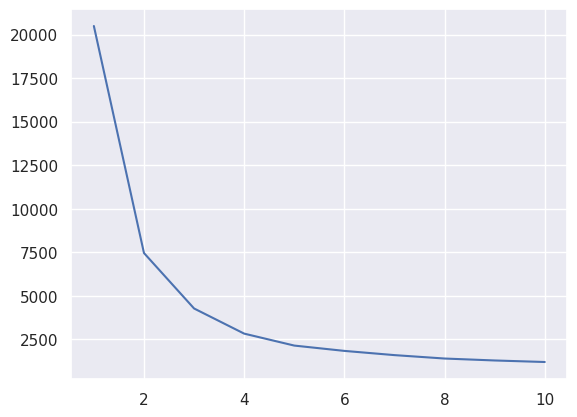

In [11]:
sns.set()
plt.plot(range(1,11),tip_wcss[0:10])
plt.show()

In [12]:
model=KMeans(4)
model.fit(df)
identify_cluster=model.fit_predict(df)
df["cluster"]=identify_cluster
df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,total_bill,tip,sex,smoker,day,time,size,cluster
0,16.99,1.01,0.0,201,301,0.0,2,0
1,10.34,1.66,1.0,201,301,0.0,3,3
2,21.01,3.50,1.0,201,301,0.0,3,0
3,23.68,3.31,1.0,201,301,0.0,2,2
4,24.59,3.61,0.0,201,301,0.0,4,2
...,...,...,...,...,...,...,...,...
239,29.03,5.92,1.0,201,304,0.0,3,2
240,27.18,2.00,0.0,202,304,0.0,2,2
241,22.67,2.00,1.0,202,304,0.0,2,0
242,17.82,1.75,1.0,201,304,0.0,2,0


In [13]:
df.cluster.value_counts()

0    94
3    78
2    51
1    21
Name: cluster, dtype: int64

In [15]:
fig=px.scatter(df, x="total_bill",y="tip",color="cluster")
fig.show()